In [1]:
# importando bibliotecas e funções necessárias
import nltk
import string
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings("ignore")

In [2]:
# fazendo a leitura da base de dados
reviews_df = pd.read_csv('amazon_alexa.tsv', sep='\t')
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
# verificando informações da base de dados
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
# verificando informações da base de dados
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


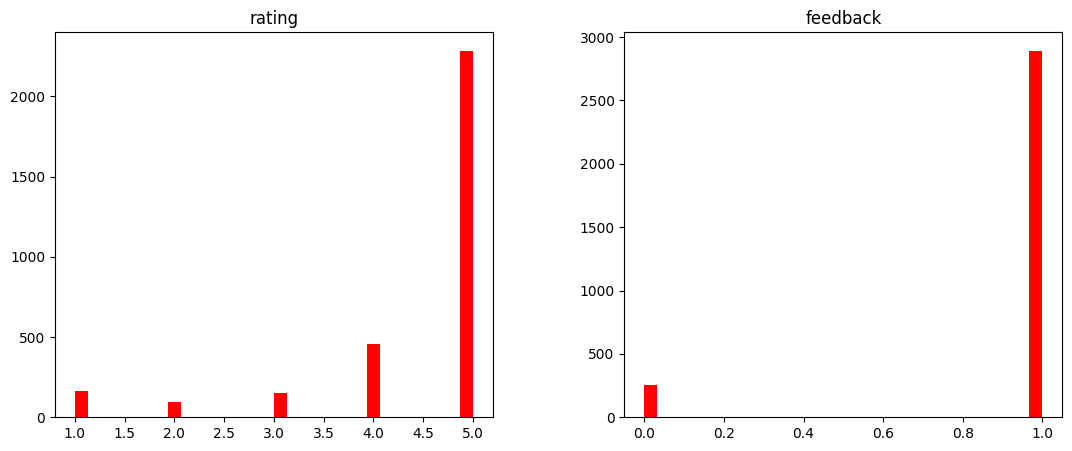

In [5]:
reviews_df.hist(bins=30, figsize=(13, 5), color='r', grid=False)
plt.show()

In [6]:
# criando coluna com a quantidade de caracteres que o review possui
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


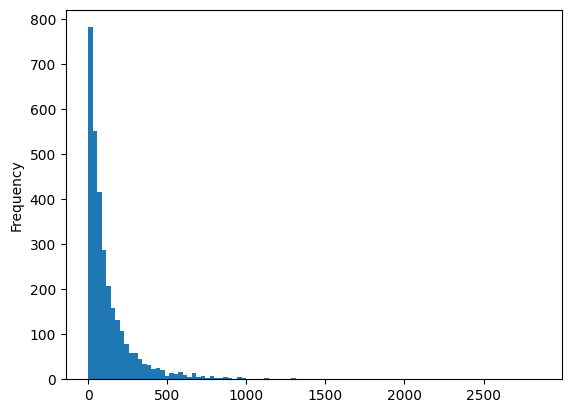

In [7]:
reviews_df['length'].plot(bins=100, kind='hist')
plt.show()

In [8]:
reviews_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

As pessoas escrevem em média 132 caracteres por review.

In [9]:
# verificando o maior review de todos
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [10]:
# verificando o menor review de todos
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [11]:
# selecionando apenas os reviews que são positivos
positive = reviews_df[reviews_df['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [12]:
# informações sobre os reviews positivos
positive.describe()

,rating,feedback,length
count,2893.000000,2893.0,2893.000000
mean,4.737643,1.0,124.659177
std,0.546544,0.0,174.624491
min,3.000000,1.0,1.000000
25%,5.000000,1.0,29.000000
50%,5.000000,1.0,69.000000
75%,5.000000,1.0,154.000000
max,5.000000,1.0,2851.000000


Os comentários positivos possuem em média 124 caracteres

In [13]:
# selecionando apenas os reviews que são negativos
negative = reviews_df[reviews_df['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [14]:
# informações sobre os reviews positivos
negative.describe()

,rating,feedback,length
count,257.000000,257.0,257.000000
mean,1.373541,0.0,215.241245
std,0.484688,0.0,236.325955
min,1.000000,0.0,1.000000
25%,1.000000,0.0,53.000000
50%,1.000000,0.0,137.000000
75%,2.000000,0.0,289.000000
max,2.000000,0.0,1686.000000


Os comentários negativos possuem em média 215 caracteres, o que faz sentido, já que geralmente as pessoas vão explicar o porquê não gostaram do produto.

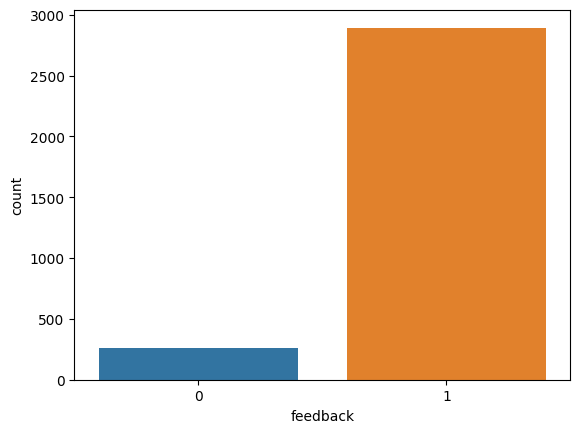

In [15]:
sns.countplot(reviews_df['feedback'])
plt.show()

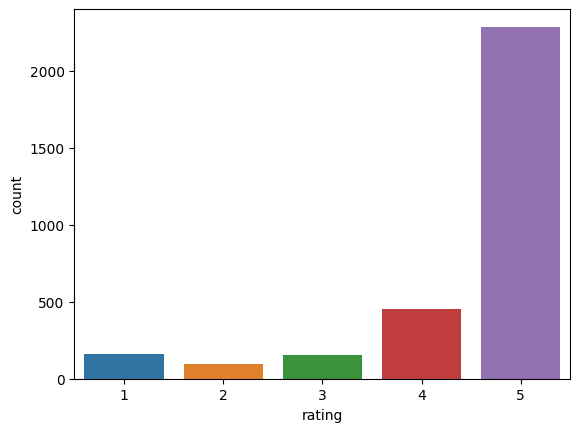

In [16]:
sns.countplot(reviews_df['rating'])
plt.show()

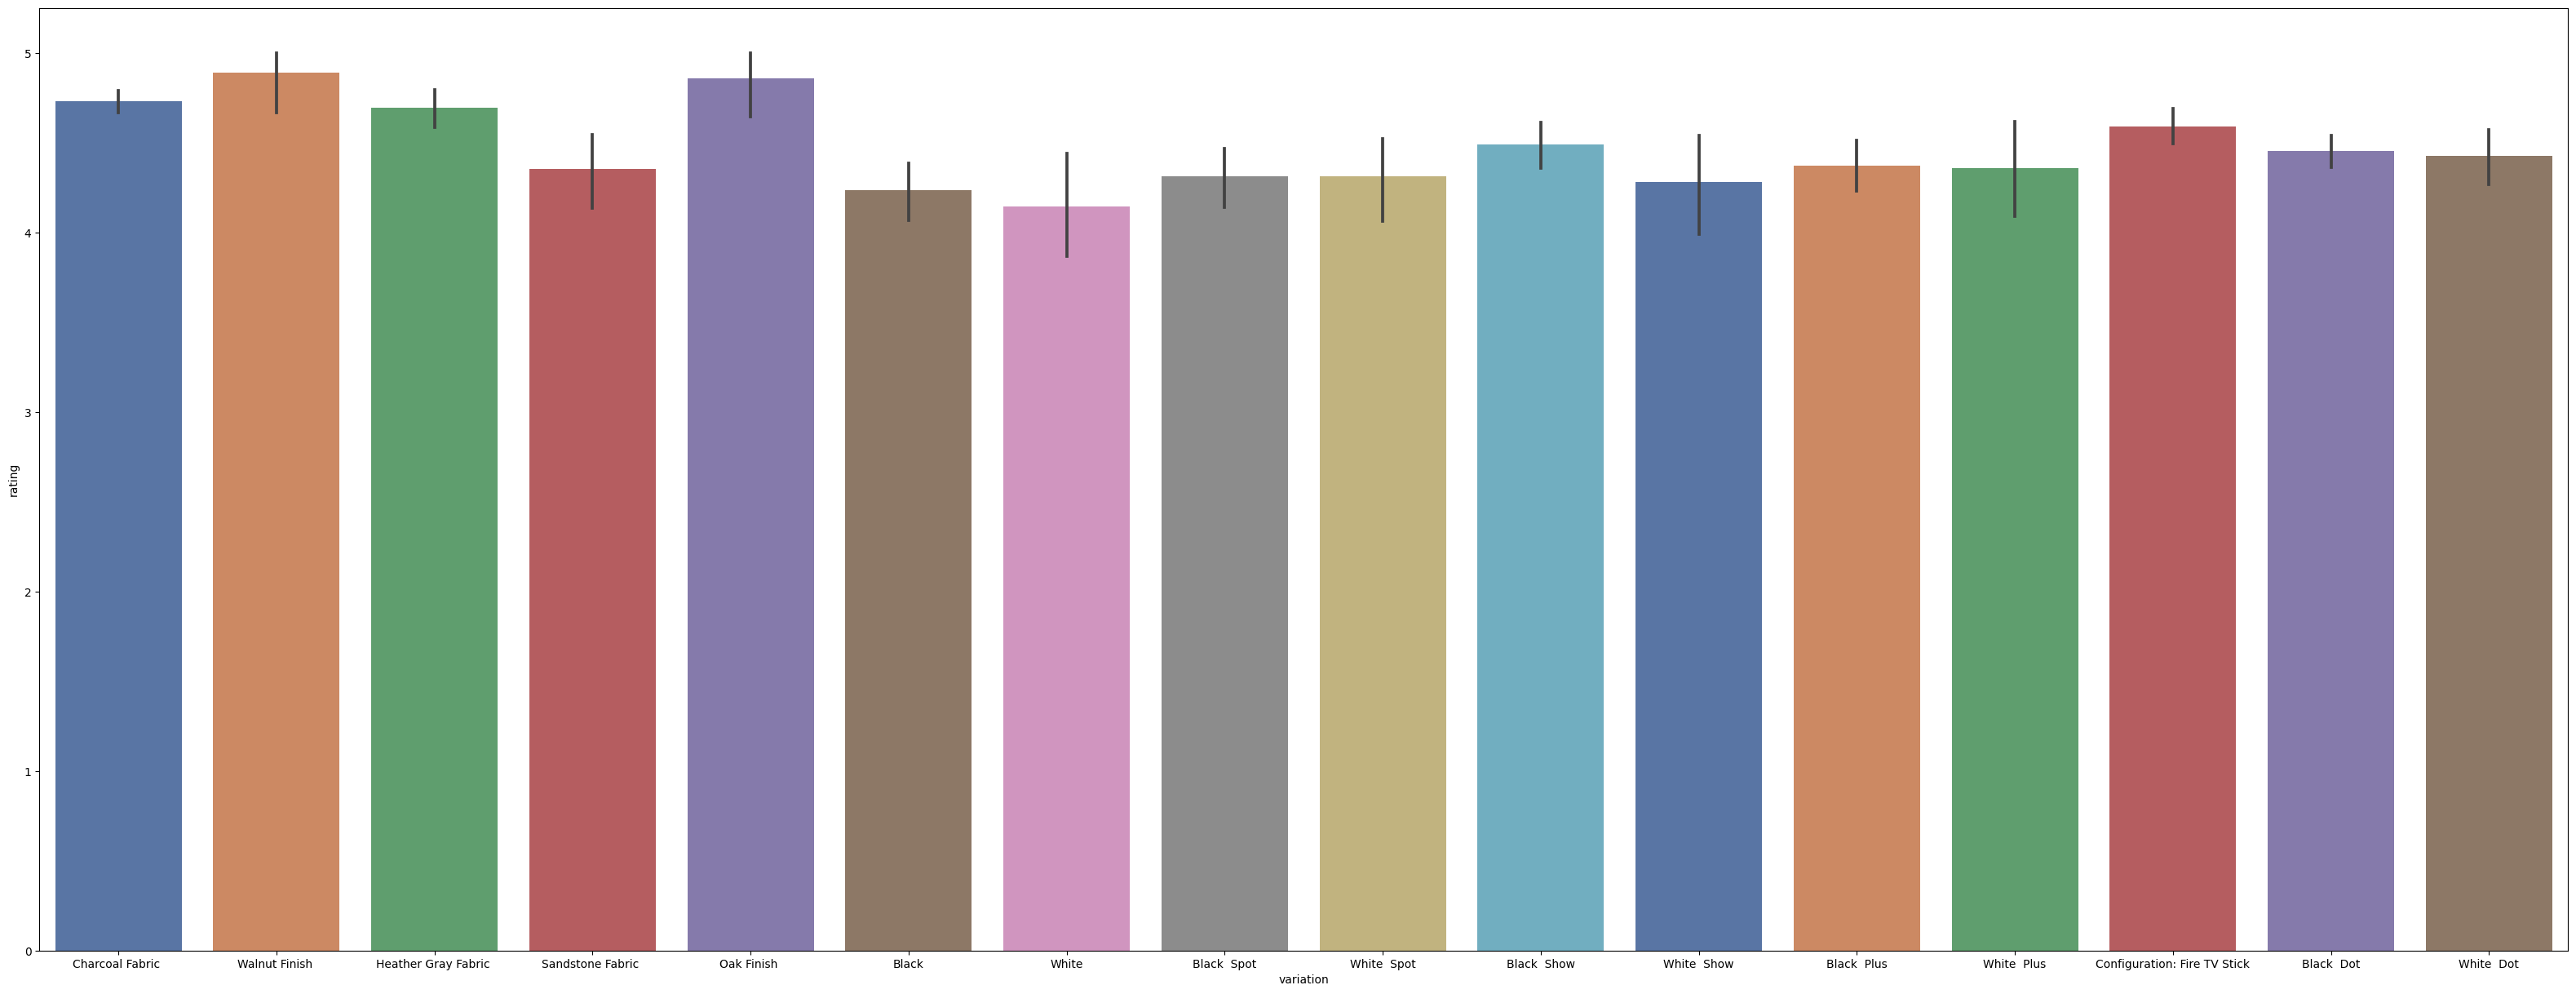

In [17]:
plt.figure(figsize=(40 ,15))
sns.barplot(x='variation', y='rating', data=reviews_df, palette='deep')
plt.show()

#### Gerando a nuvem de palavras

In [18]:
# selecioando todos os comentários
sentences = reviews_df['verified_reviews'].tolist()
len(sentences)

3150

In [19]:
# transformando todos os comentários em apenas um texto
sentences_as_one_string = ' '.join(sentences)
len(sentences_as_one_string)

419105

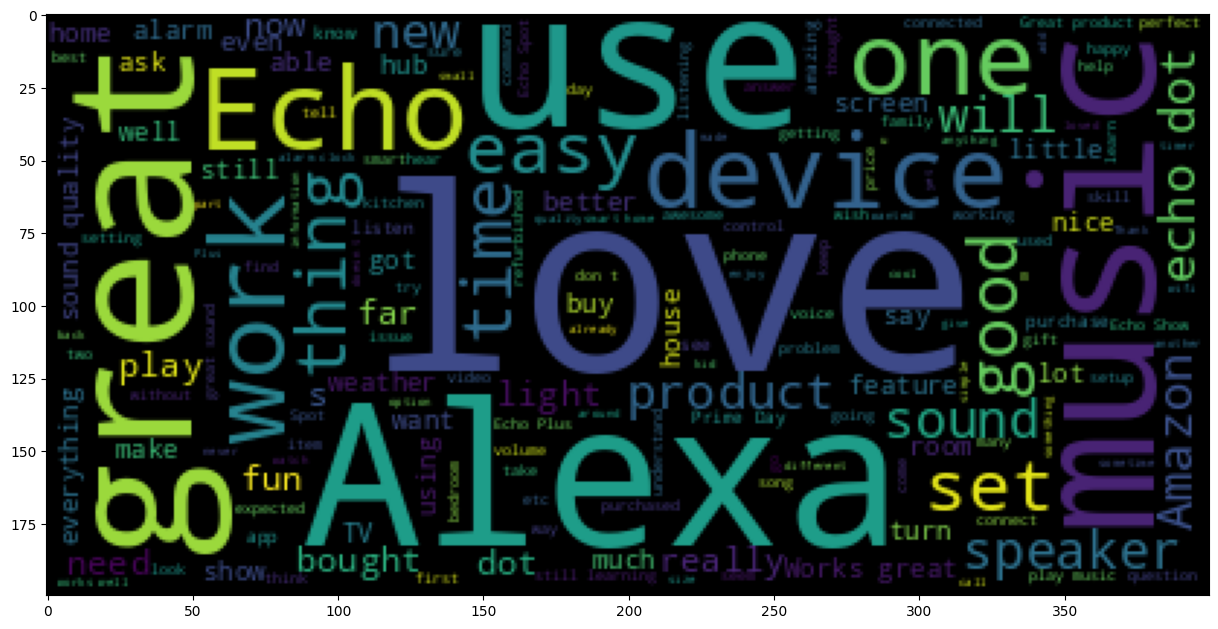

In [20]:
# gerando a nuvem de palavras de todos os comentários
plt.figure(figsize=(15, 15))
plt.imshow(WordCloud().generate(sentences_as_one_string))
plt.show()

In [21]:
# selecionando apenas comentários que são negativos
negative_list = negative['verified_reviews'].tolist()
negative_sentences_as_one_string = ' '.join(negative_list)
len(negative_sentences_as_one_string)

55573

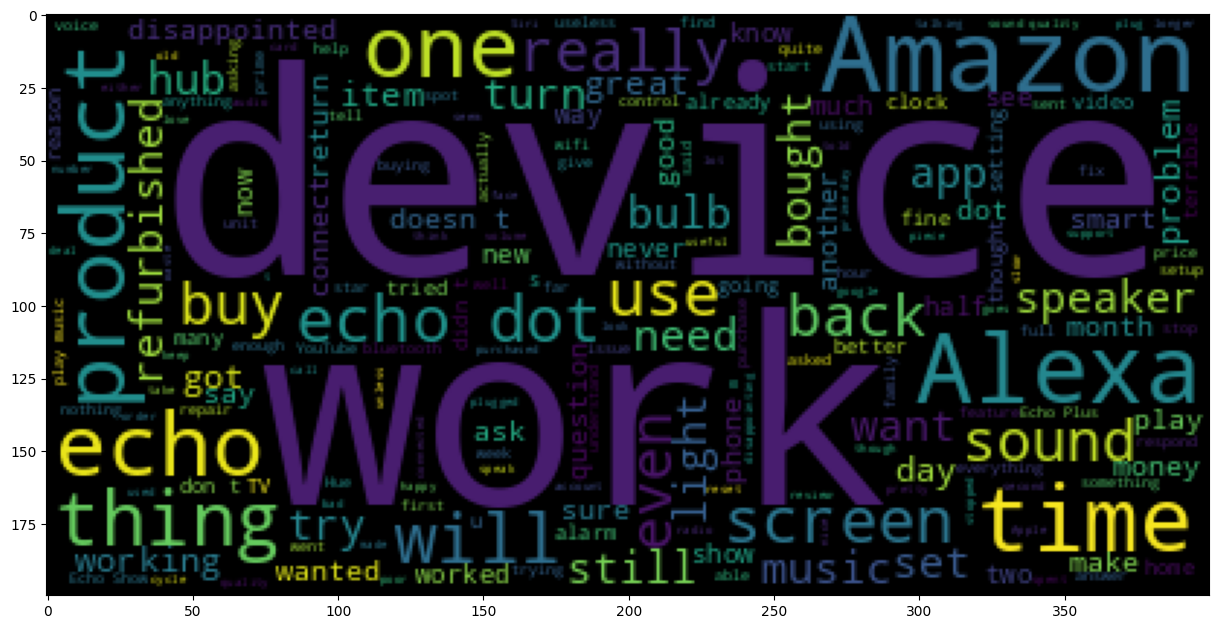

In [22]:
# gerando nuvem apenas com comentários negativos
plt.figure(figsize=(15, 15))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))
plt.show()

#### Limpeza dos dados

In [23]:
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis=1)
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [24]:
# verificando quais são as características existentes
reviews_df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [25]:
x_cat = reviews_df[['variation']]
x_cat

,variation
0,Charcoal Fabric
1,Charcoal Fabric
2,Walnut Finish
3,Charcoal Fabric
4,Charcoal Fabric
...,...
3145,Black Dot
3146,Black Dot
3147,Black Dot
3148,White Dot


In [26]:
# criando as colunas com os tipos das categorias existentes
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [27]:
x_cat.shape

(3150, 16)

In [28]:
x_cat = pd.DataFrame(x_cat)
type(x_cat)

pandas.core.frame.DataFrame

In [29]:
reviews_df.drop(['variation'], axis=1, inplace=True)
reviews_df

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [30]:
reviews_df = pd.concat([reviews_df, x_cat], axis=1)
reviews_df

,verified_reviews,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Love my Echo!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,"Listening to music, searching locations, check...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,"I do love these things, i have them running my...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ronaldy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
# stopwords em inglês
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
# quantidade de stopwords em inglês
len(stopwords.words('english'))

179

In [34]:
# stopwords em português
print(stopwords.words('portuguese'))

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [35]:
# quantidade de stopwords em português
len(stopwords.words('portuguese'))

207

#### Pipeline de limpeza dos textos

In [36]:
# função que remove caracteres especiais e stopwords
def message_cleaning(message):
    text = [char for char in message if char not in string.punctuation]
    text = ''.join(text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return text

In [37]:
# aplicando a função para limpeza dos dados
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [38]:
# transformando as palavras em números para o treinamento do algoritmo
vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [39]:
reviews_df

,verified_reviews,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Love my Echo!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,"Listening to music, searching locations, check...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,"I do love these things, i have them running my...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)
reviews_df.head()

,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
type(reviews)

pandas.core.frame.DataFrame

In [42]:
reviews_df = pd.concat([reviews_df, reviews], axis=1)
reviews_df

,feedback,0,1,2,3,4,5,6,7,8,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# selecionando os dados de entrada
x = reviews_df.drop(['feedback'], axis=1)
x

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# selecionando os dados de saída
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

#### Algoritmo Naive Bayes

In [45]:
# dividindo a base de dados entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
# realizando a criação e o treinamento do algoritmo
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train)

MultinomialNB()

In [47]:
# medindo a acurácia do algoritmo
y_pred = naive_bayes.predict(x_test)
accuracy_score(y_pred, y_test)

0.9333333333333333

Nem sempre a acurácia é um bom parâmetro para mensurar a qualidade de algoritmos de classificação.

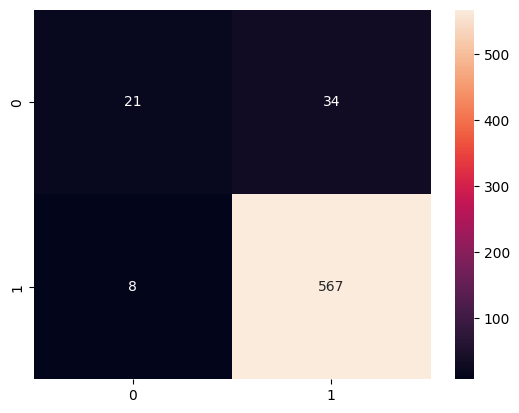

In [48]:
# plotando matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.3g')
plt.show()

In [49]:
# visualizando outras métricas para avaliar a performance do algoritmo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.38      0.50        55
           1       0.94      0.99      0.96       575

    accuracy                           0.93       630
   macro avg       0.83      0.68      0.73       630
weighted avg       0.92      0.93      0.92       630



#### Treinamento e avaliação de algoritmo com regressão logística

In [50]:
# realizando a criação e o treinamento do algoritmo
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression()

In [51]:
# medindo a acurácia do algoritmo
y_pred = logistic.predict(x_test)
accuracy_score(y_test, y_pred)

0.926984126984127

In [52]:
# visualizando outras métricas para avaliar a performance do algoritmo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.27      0.39        55
           1       0.93      0.99      0.96       575

    accuracy                           0.93       630
   macro avg       0.82      0.63      0.68       630
weighted avg       0.92      0.93      0.91       630



#### Classificação de apenas uma frase

In [53]:
# salvando os modelos treinados
with open('text_classifier.pkl', 'wb') as file:
    pickle.dump([naive_bayes, onehotencoder, vectorizer], file)

In [54]:
# fazendo a leitura dos modelos que já estão treinados
with open('text_classifier.pkl', 'rb') as file:
    bayes, onehot, vec = pickle.load(file)

In [55]:
negative.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [56]:
negative_text = negative.iloc[0:1, [2, 3]]
negative_text

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [57]:
x_cat = negative_text[['variation']]
x_cat

,variation
46,Charcoal Fabric


In [58]:
x_cat = onehot.transform(x_cat).toarray()
x_cat = pd.DataFrame(x_cat)
x_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
negative_text

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [60]:
x_cat.index = negative_text.index

In [61]:
negative_df = pd.concat([negative_text, x_cat], axis=1)
negative_df

,variation,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
negative_df.drop(['variation'], axis=1, inplace=True)
negative_df

,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
negative_coutvectorizer = vec.transform(negative_df['verified_reviews'])
negative_coutvectorizer

<1x5211 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [64]:
review = pd.DataFrame(negative_coutvectorizer.toarray())
review

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
negative_df.drop(['verified_reviews'], axis=1, inplace=True)
negative_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
negative_df.index = review.index

In [67]:
negative_final = pd.concat([negative_df, review], axis=1)
negative_final

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# o algoritmo está classificando este comentário como sendo do tipo negativo, o que faz sentido
bayes.predict(negative_final)

array([0])

In [69]:
bayes.predict_proba(negative_final)

array([[0.55793599, 0.44206401]])